Theodore 

The purpose of this notebook is to analyze the data stored in the .npz file.

### Load the data 

In [22]:
## ------------------------ IMPORT LIB ------------------------ ##

import numpy as np
import matplotlib.pyplot as plt
from DataSet import DataSet
from PostProcessor import PostProcessor
from scipy.stats import linregress

In [ ]:
## ------------------------ DEFINE COUNSTANTS AND VARIABLES ------------------------ ##

# AF = 'EI'

In [7]:
pp1 = PostProcessor('results/gpbo_custom_FixedGP_UCB_first_GPBO_validResponses_customFGP.npz')
pp1.load_data(load_durations=True)
pp2 = PostProcessor('results/gpbo_custom_FixedOnlineGP_UCB_first_GPBO_validResponses_customFOGP.npz')
pp2.load_data(load_durations=True)

print(pp2.data.files)

['P_test_x', 'P_test_x_idx', 'P_test_y', 'best_pred_x', 'best_pred_x_measured', 'rand_idx', 'elapsed_time', 'P_mean_pred', 'P_std_pred', 'iter_durations', 'gp_durations', 'state_of_the_simu', 'emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy']


In [11]:
print(pp2.data['gp_durations'])

[[[[0.0012499 0.0007318 0.0018663 ... 0.0179341 0.0259163 0.0188587]]

  [[0.0010367 0.0015675 0.0013496 ... 0.0158394 0.0153919 0.0163653]]]


 [[[0.0007013 0.0011936 0.0005987 ... 0.0155343 0.0174484 0.0169285]]

  [[0.0014546 0.0015096 0.0021067 ... 0.0201747 0.0180241 0.0182132]]]


 [[[0.0009325 0.0005884 0.0005274 ... 0.0162534 0.0155663 0.0176676]]

  [[0.0013892 0.0016169 0.0009017 ... 0.0206784 0.016585  0.0157574]]]


 [[[0.0005621 0.0007732 0.0005584 ... 0.0164267 0.0163919 0.0161516]]

  [[0.0014371 0.0006772 0.0005645 ... 0.016531  0.0159746 0.0160616]]]


 [[[0.0008364 0.0006786 0.0005636 ... 0.0174458 0.0197634 0.0209709]]

  [[0.0005324 0.0005851 0.0008606 ... 0.0175694 0.0154863 0.0166619]]]


 [[[0.0005473 0.0006291 0.0005892 ... 0.0162947 0.0156718 0.0159668]]

  [[0.0014237 0.0014477 0.0013119 ... 0.0165353 0.016624  0.018418 ]]]]


### exploration and exploitation performances

In [3]:
print(pp1.best_pred_x.shape)

(6, 2, 1, 1000)


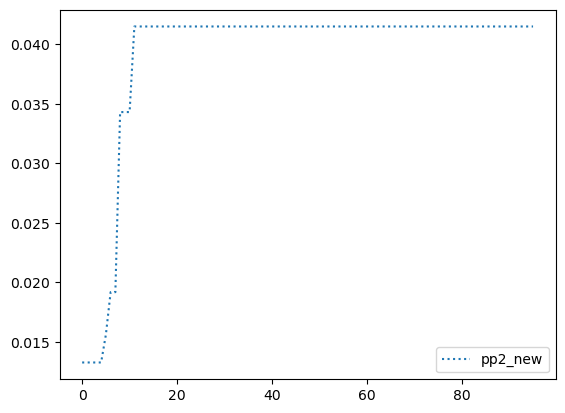

0.041497223
23
[ 0 40 40 40 40 20 11 22 42 32 32 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]
[40 40 40 40 40 30 21 21 32 32 32 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]
[40 87 18 69 37 30 21  2 32 52 33 23 13 24 22 23 23 23 23  0 92 38 65 89
 23  7 72 57 23 94 45 54 23 43 23 78 58 60 17 23 23 10 23 23 23 23 74 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]


In [5]:
# best_x_1 = pp1.best_pred_x[0, 0, 0, :]
best_x_2 = pp2.best_pred_x[0, 0, 0, :]
# best_x_new_1 = pp1.best_pred_x_measured[0, 0, 0, :]
best_x_measured_2 = pp2.best_pred_x_measured[0, 0, 0, :]

# plt.plot(pp1.ds_set['sorted_respMean'][best_x_1, 0], label='pp1', linewidth=4)
# plt.plot(pp2.ds_set['sorted_respMean'][best_x_2, 0], label='pp2', linestyle='--')
# plt.plot(pp1.ds_set['sorted_respMean'][best_x_measured_1, 0], label='pp1_new')
plt.plot(pp2.ds_set['sorted_respMean'][best_x_measured_2, 0], label='pp2_new', linestyle=':')
plt.legend()
plt.show()

print(np.max(pp1.ds_set['sorted_respMean'][:, 0]))
print(np.argmax(pp1.ds_set['sorted_respMean'][:, 0]))

print(best_x_2)
print(best_x_measured_2)
print(pp2.P_test_x_idx[0, 0, 0, :])


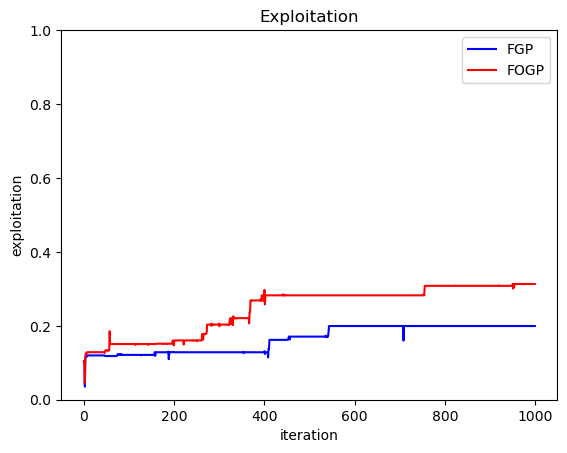

In [4]:
plt.plot(pp1.exploitation(), label='FGP', color='b')
plt.plot(pp2.exploitation(), label='FOGP', color='r')
plt.legend()
plt.title("Exploitation")
plt.xlabel("iteration")
plt.ylabel("exploitation")
plt.ylim(0, 1)
plt.show()

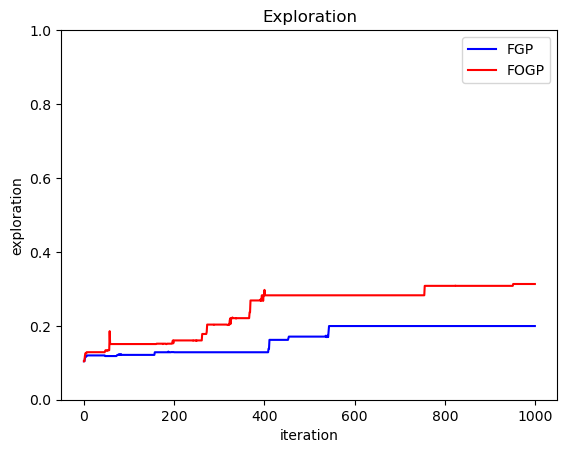

In [5]:

plt.plot(pp1.exploration(), label='FGP', color='b')
plt.plot(pp2.exploration(), label='FOGP', color='r')

plt.legend()
plt.title("Exploration")
plt.xlabel("iteration")
plt.ylabel("exploration")
plt.ylim(0, 1)
plt.show()

In [20]:
perf_iter1, perf_gp1, perf_hyp, perf_mean, perf_std = pp1.duration_metrics()
perf_iter2, perf_gp2, perf_hyp, perf_mean, perf_std = pp2.duration_metrics()
print(perf_iter1.shape)

(1000,)


In [12]:
print(perf_mean)

nan


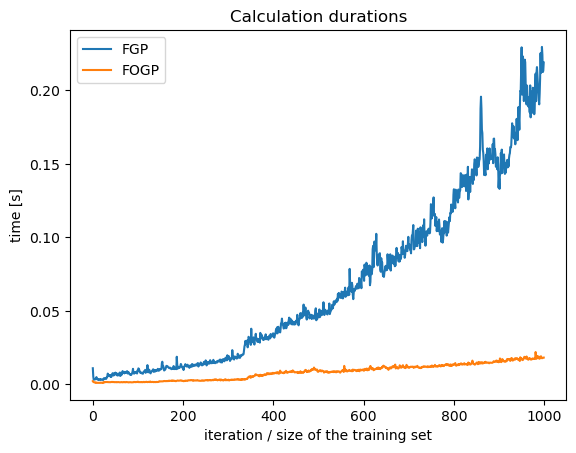

In [21]:
plt.plot(perf_iter1, label='FGP')
plt.plot(perf_iter2, label='FOGP')

plt.legend()
plt.title("Calculation durations")
plt.xlabel("iteration / size of the training set")
plt.ylabel("time [s]")
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1.e-3, 1)
plt.show()

Whith CHOLESKY : 
Calculated exponent (p): 2.05
Coefficient (alpha): 1.40e-07
Whith SCHUR : 
Calculated exponent (p): 1.11
Coefficient (alpha): 7.99e-06


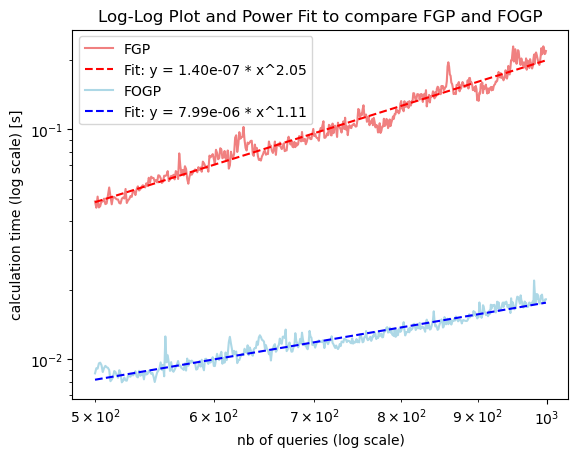

In [24]:

x=np.arange(1000)
# Convert to log scale to fit a line and determine p
log_x = np.log(x[500:])
log_y = np.log(perf_iter1[500:])

# Perform linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Display the result for the slope, which corresponds to the power p
print("Whith CHOLESKY : ")
print(f"Calculated exponent (p): {slope:.2f}")
print(f"Coefficient (alpha): {np.exp(intercept):.2e}")

# Plot the log-log graph
plt.loglog(x[500:], perf_iter1[500:], label='FGP', color='lightcoral')
plt.loglog(x[500:], np.exp(intercept) * x[500:]**slope, '--', label=f'Fit: y = {np.exp(intercept):.2e} * x^{slope:.2f}', color='red')


# Convert to log scale to fit a line and determine p
log_x = np.log(x[500:])
log_y = np.log(perf_iter2[500:])

# Perform linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Display the result for the slope, which corresponds to the power p
print("Whith SCHUR : ")
print(f"Calculated exponent (p): {slope:.2f}")
print(f"Coefficient (alpha): {np.exp(intercept):.2e}")

# Plot the log-log graph
plt.loglog(x[500:], perf_iter2[500:], label='FOGP', color='lightblue')
plt.loglog(x[500:], np.exp(intercept) * x[500:]**slope, '--', label=f'Fit: y = {np.exp(intercept):.2e} * x^{slope:.2f}', color='blue')



# Add labels and legend
plt.xlabel('nb of queries (log scale)')
plt.ylabel('calculation time (log scale) [s]')
plt.title('Log-Log Plot and Power Fit to compare FGP and FOGP')
plt.legend()
plt.show()

In [10]:
emgs_idx = list(range(pp9.nb_emg))
print(emgs_idx)
REP_idx = list(range(pp9.NB_REP))
print(REP_idx)
print(pp9.iter_durations.shape)
print(pp9.iter_durations[emgs_idx, 2, :, :])



print(pp9.hyp_opti_durations.shape)
print(pp9.mean_calc_durations.shape)
print(pp9.std_calc_durations.shape)
perf_iter, perf_gp, perf_hyp, perf_mean, perf_std = pp9.duration_metrics()

[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(6, 10, 1, 300)
[[[0.0099898 0.1225543 0.0423113 ... 0.6533899 0.682564  0.6239624]]

 [[0.0107663 0.1204132 0.0524677 ... 0.7165828 0.6645824 0.7754128]]

 [[0.0103719 0.1209535 0.0643376 ... 0.7092836 0.7479657 0.7199197]]

 [[0.0136024 0.1180411 0.0621119 ... 0.7222003 0.7274088 0.7227952]]

 [[0.0110334 0.0341585 0.0550296 ... 0.6403745 0.6324555 0.6222077]]

 [[0.0120822 0.228787  0.049953  ... 0.6240857 0.6354915 0.6327286]]]
(6, 10, 1, 300)
(6, 10, 1, 300)
(6, 10, 1, 300)


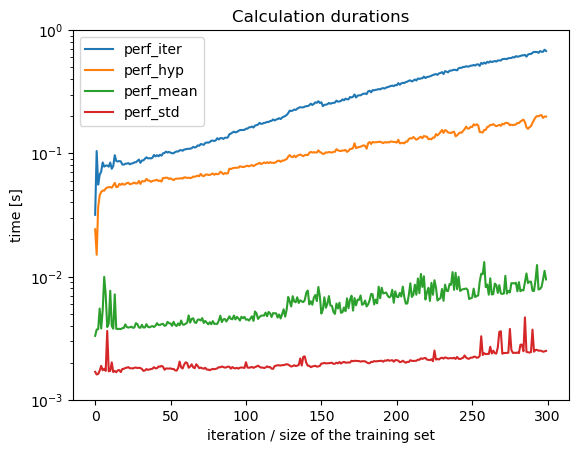

In [11]:
plt.plot(perf_iter, label='perf_iter')
plt.plot(perf_hyp, label='perf_hyp')
plt.plot(perf_mean, label='perf_mean')
plt.plot(perf_std, label='perf_std')
plt.legend()
plt.title("Calculation durations")
plt.xlabel("iteration / size of the training set")
plt.ylabel("time [s]")
plt.yscale('log')
# plt.xscale('log')
plt.ylim(1.e-3, 1)
plt.show()